# ASSIGNMENT- Parameter Optimization

## Step 1: Install and Import Libraries

In [1]:

!pip install -q pandas numpy scikit-learn matplotlib

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import random


## Step 2: Load and Prepare Dataset

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

In [12]:
print("Class Distribution:")
print(data['quality'].value_counts())

Class Distribution:
quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


In [3]:
X = data.drop('quality', axis=1)
y = data['quality']


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Step 3: Create 10 Train/Test Samples

In [13]:
samples = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))


## Step 4: Define Parameter Grid


In [14]:
kernel_options = ['rbf', 'poly', 'sigmoid']
C_options = [0.1, 1, 10]
gamma_options = ['scale', 'auto']


##  Step 5: Optimize SVM for Each Sample

In [16]:
from sklearn.svm import SVC


In [17]:
results = []
all_accuracies = []

for idx, (X_train, X_test, y_train, y_test) in enumerate(samples):
    best_acc = 0
    best_params = None
    acc_history = []

    print(f"\n🔍 Optimizing for Sample S{idx+1}...")

    for _ in tqdm(range(100)):
        kernel = random.choice(kernel_options)
        C = random.choice(C_options)
        gamma = random.choice(gamma_options)

        try:
            model = SVC(kernel=kernel, C=C, gamma=gamma)
            model.fit(X_train, y_train)
            preds = model.predict(X_test)
            acc = accuracy_score(y_test, preds)
            acc_history.append(acc)

            if acc > best_acc:
                best_acc = acc
                best_params = (kernel, C, gamma)

        except Exception as e:
            print("Error:", e)

    results.append((f"S{idx+1}", best_acc, best_params))
    all_accuracies.append(acc_history)



🔍 Optimizing for Sample S1...


100%|██████████| 100/100 [00:10<00:00,  9.13it/s]



🔍 Optimizing for Sample S2...


100%|██████████| 100/100 [00:10<00:00,  9.38it/s]



🔍 Optimizing for Sample S3...


100%|██████████| 100/100 [00:10<00:00,  9.77it/s]



🔍 Optimizing for Sample S4...


100%|██████████| 100/100 [00:10<00:00,  9.76it/s]



🔍 Optimizing for Sample S5...


100%|██████████| 100/100 [00:10<00:00,  9.39it/s]



🔍 Optimizing for Sample S6...


100%|██████████| 100/100 [00:10<00:00,  9.19it/s]



🔍 Optimizing for Sample S7...


100%|██████████| 100/100 [00:10<00:00,  9.26it/s]



🔍 Optimizing for Sample S8...


100%|██████████| 100/100 [00:10<00:00,  9.29it/s]



🔍 Optimizing for Sample S9...


100%|██████████| 100/100 [00:10<00:00,  9.42it/s]



🔍 Optimizing for Sample S10...


100%|██████████| 100/100 [00:09<00:00, 10.01it/s]


## Step 6: Display Result Table

In [18]:
result_df = pd.DataFrame(results, columns=["Sample #", "Best Accuracy", "Best Parameters (Kernel, C, Gamma)"])
result_df


,Sample #,Best Accuracy,"Best Parameters (Kernel, C, Gamma)"
0,S1,0.637500,"(rbf, 1, auto)"
1,S2,0.610417,"(rbf, 1, auto)"
2,S3,0.620833,"(rbf, 10, scale)"
3,S4,0.660417,"(rbf, 10, scale)"
4,S5,0.629167,"(rbf, 1, auto)"
5,S6,0.639583,"(rbf, 10, auto)"
6,S7,0.643750,"(rbf, 1, scale)"
7,S8,0.625000,"(rbf, 10, auto)"
8,S9,0.635417,"(rbf, 1, scale)"
9,S10,0.652083,"(poly, 1, scale)"


## Step 7: Plot Convergence Graph for Best Sample

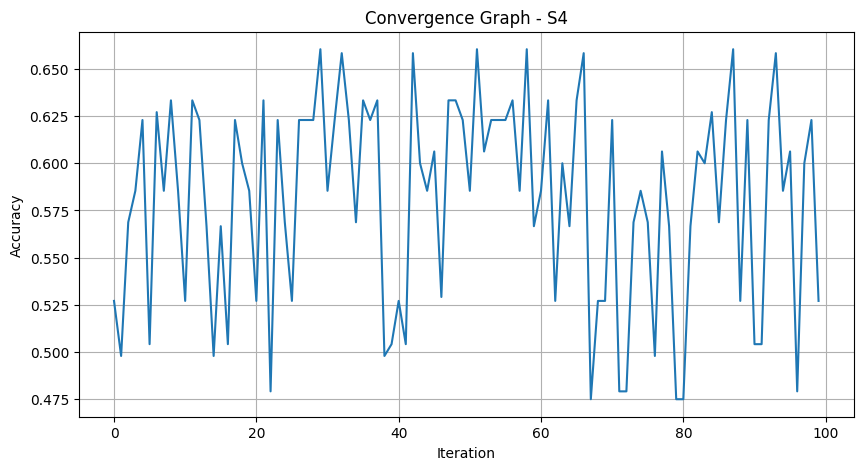

In [19]:
# Find index with highest best accuracy
best_sample_idx = np.argmax(result_df["Best Accuracy"])

plt.figure(figsize=(10, 5))
plt.plot(all_accuracies[best_sample_idx])
plt.title(f"Convergence Graph - {result_df.iloc[best_sample_idx, 0]}")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()
